In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import numpy as np

import torch

from transformers import GPT2Tokenizer, GPT2LMHeadModel

from transformer_geometrical_analysis.utils.retrieval import get_activations


In [4]:
gpt2_version = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_version)
model = GPT2LMHeadModel.from_pretrained(gpt2_version, output_hidden_states=True, return_dict_in_generate=True)

In [5]:
# constants of the model
TOTAL_VOCAB_SIZE = tokenizer.vocab_size
MAXIMUM_INPUT_LENGTH = 1024
N_BLOCKS = 12

TOTAL_VOCAB_SIZE

50257

In [6]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [7]:
with open("input_phrases copy.txt", "r") as f:
    prompts = [line.strip() for line in f if line.strip()]

print(len(model.transformer.h))

12


In [8]:
from collections import defaultdict

In [9]:
# 1) register hooks once: initialization
activations = get_activations(model)
num_blocks = len(model.transformer.h)

In [10]:
# 2) run all prompts so our hooks fill `activations[...]`
for prompt in prompts:
    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        _ = model(**inputs)


=== Block 0 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [26.68571  21.945415 20.072739 19.553143 19.267342]
      MP bounds: [0.000, 8.173]
      top 5 overlaps: [0.2364772  0.37498899 0.28395305 0.16077615 0.160035  ]



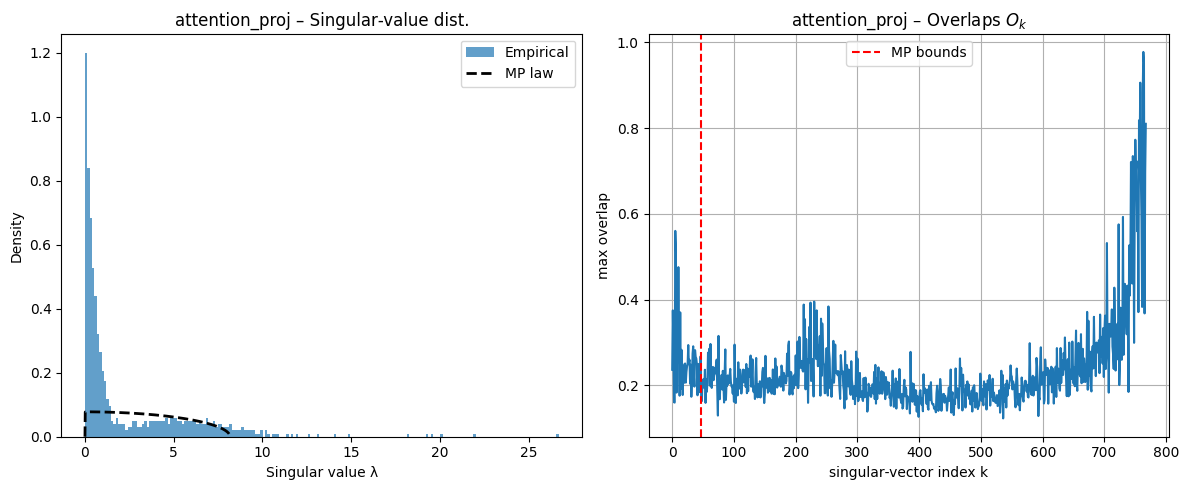

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [42.10523  25.104057 19.003927 17.515568 17.437208]
      MP bounds: [3.912, 11.737]
      top 5 overlaps: [0.21710336 0.20443828 0.32273575 0.28725096 0.14236663]



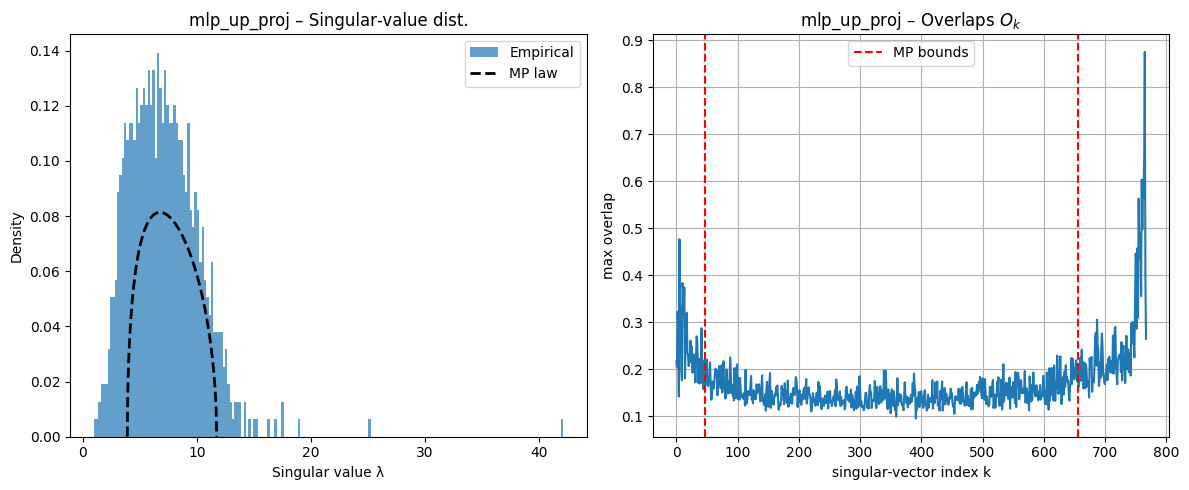

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [25.033083 21.053623 18.337223 17.38064  16.256277]
      MP bounds: [0.000, 7.313]
      top 5 overlaps: [0.17189393 0.16021993 0.157372   0.23074922 0.24963335]



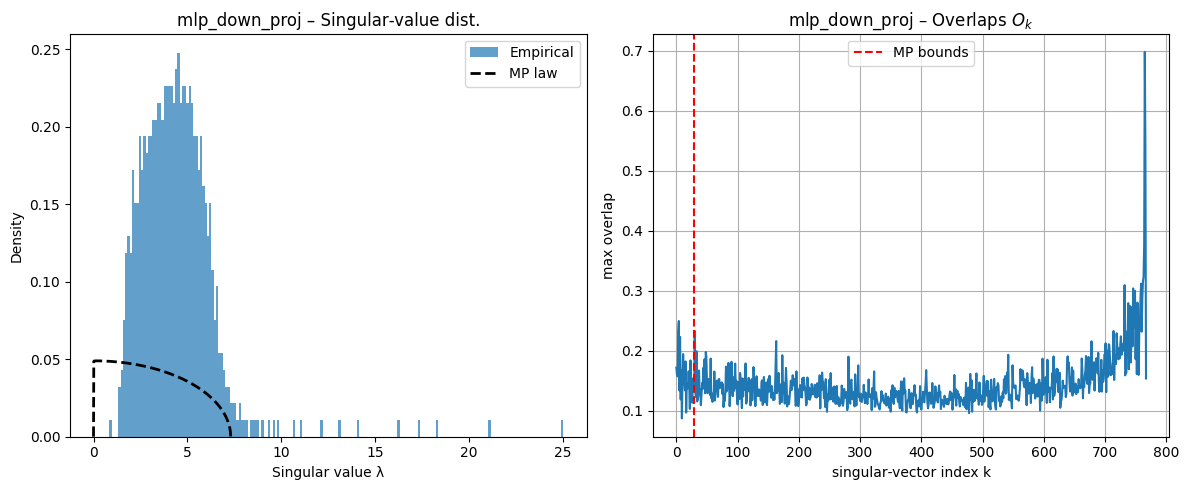


=== Block 1 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [26.942665  18.28963   17.114307  14.3792095 14.045343 ]
      MP bounds: [0.000, 5.649]
      top 5 overlaps: [0.70224636 0.38372586 0.41945436 0.16162262 0.2190531 ]



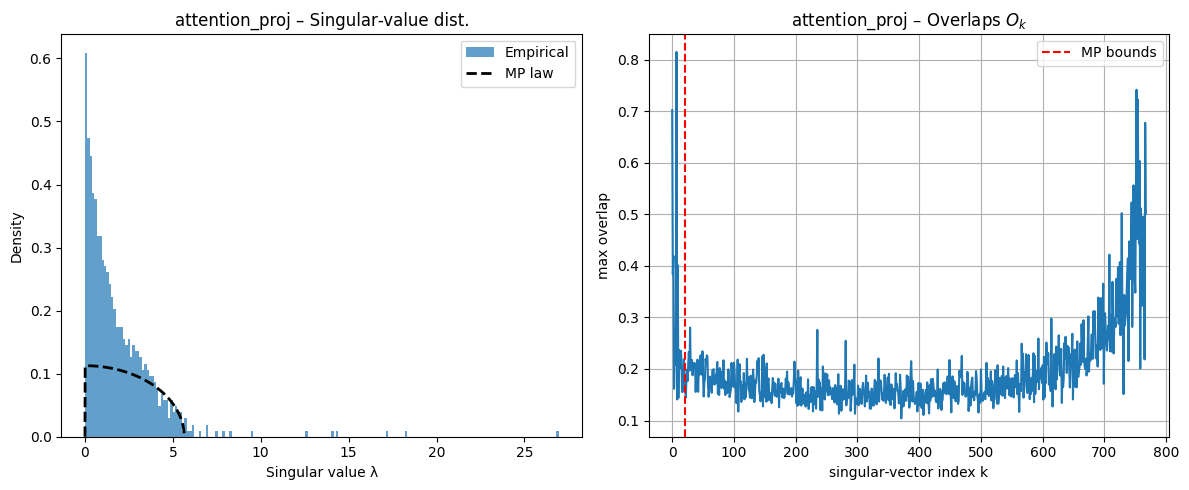

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [38.6397   27.224878 20.861197 18.683702 18.155819]
      MP bounds: [3.623, 10.868]
      top 5 overlaps: [0.32500534 0.52427085 0.22761193 0.17682972 0.49024341]



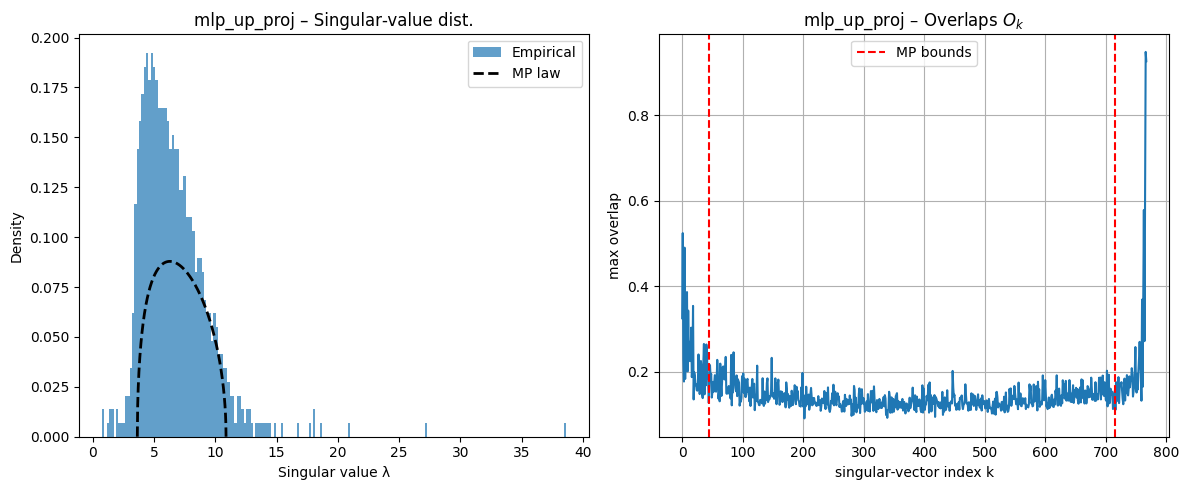

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [28.70648  23.103569 18.841396 13.833972 13.739472]
      MP bounds: [0.000, 7.249]
      top 5 overlaps: [0.81936153 0.90337417 0.29762922 0.14923004 0.28572261]



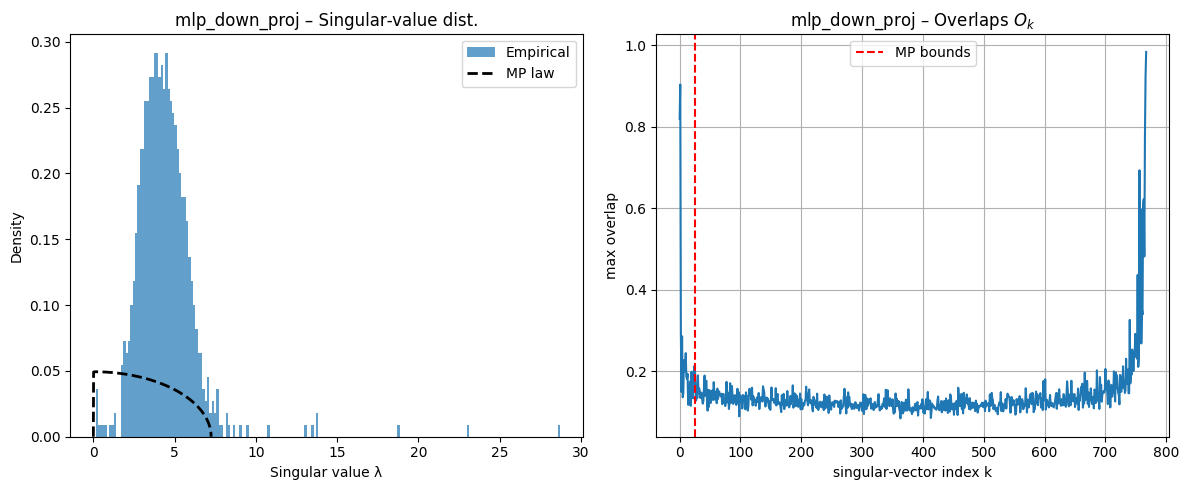


=== Block 2 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [13.932549   8.446818   8.018706   7.668459   7.0211883]
      MP bounds: [0.000, 4.491]
      top 5 overlaps: [0.25146381 0.18552494 0.15027335 0.15852756 0.12196442]



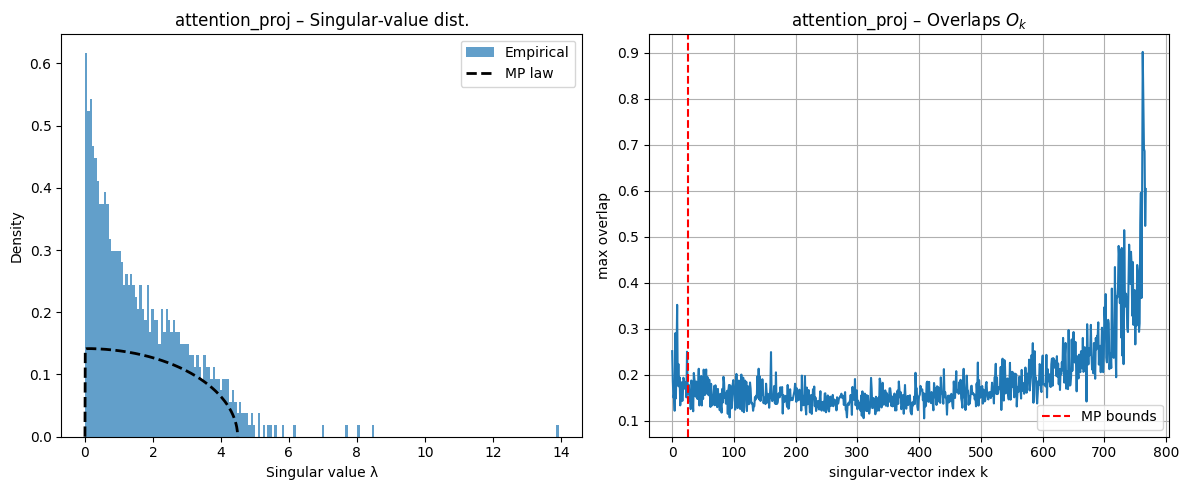

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [38.75123  32.40382  22.221004 20.78508  19.965721]
      MP bounds: [3.700, 11.101]
      top 5 overlaps: [0.24882847 0.20620661 0.20742641 0.32965814 0.18974947]



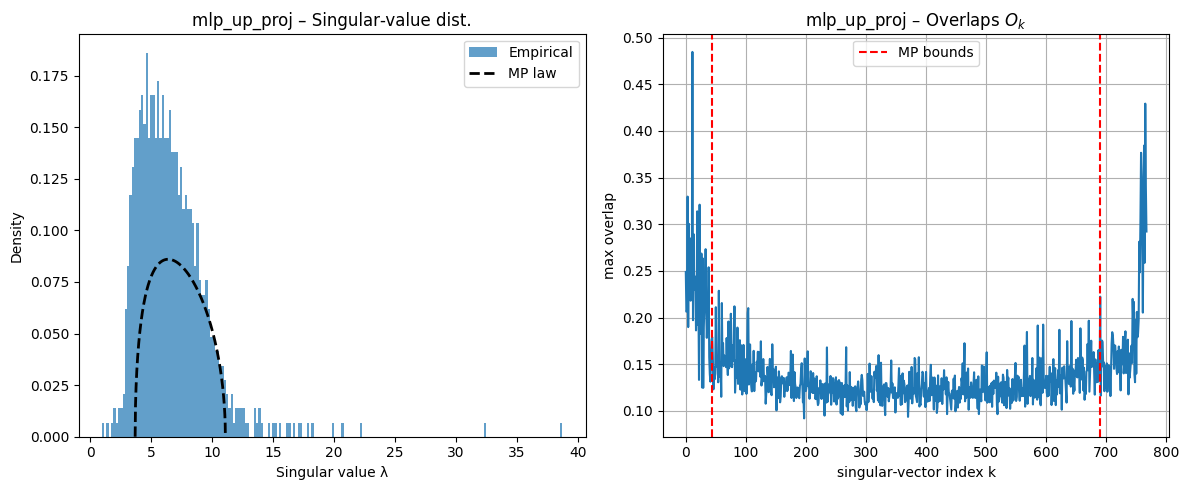

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [38.254498 15.164708 13.083903 12.103218 11.579123]
      MP bounds: [0.000, 7.739]
      top 5 overlaps: [0.98510556 0.1748634  0.51537478 0.41990045 0.27650926]



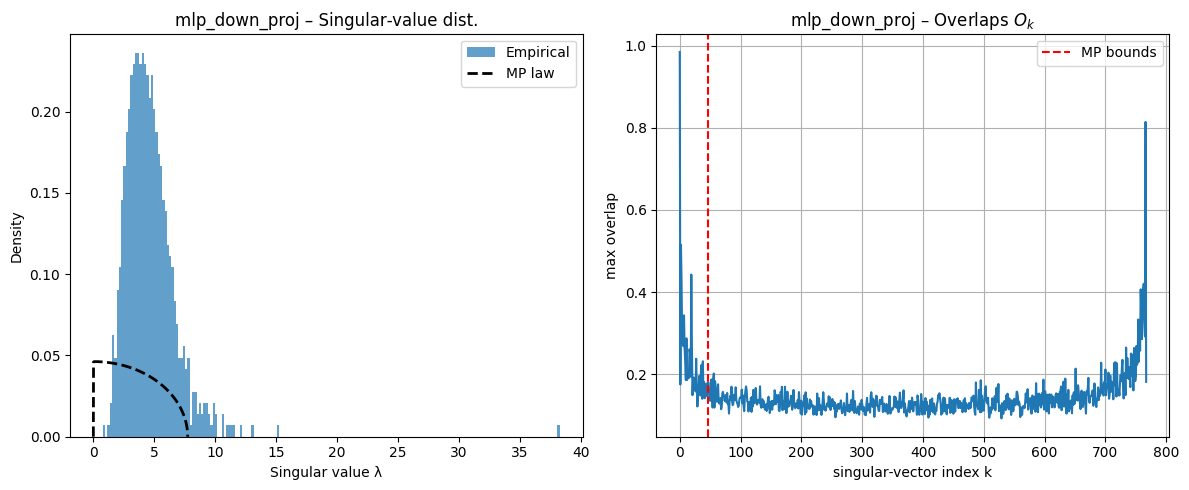


=== Block 3 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [12.972315   6.5814233  6.4028716  6.304977   6.0279493]
      MP bounds: [0.000, 4.663]
      top 5 overlaps: [0.19090845 0.28385457 0.25682917 0.3748617  0.22863111]



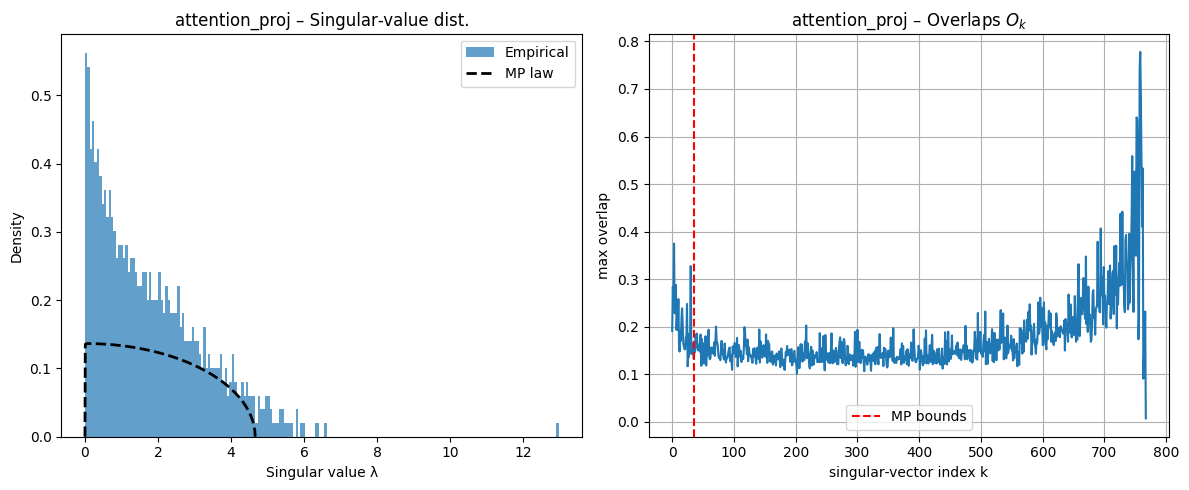

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [32.490036 18.568136 17.984472 17.807253 17.184204]
      MP bounds: [3.590, 10.769]
      top 5 overlaps: [0.16435947 0.53926824 0.43151727 0.32655426 0.2702779 ]



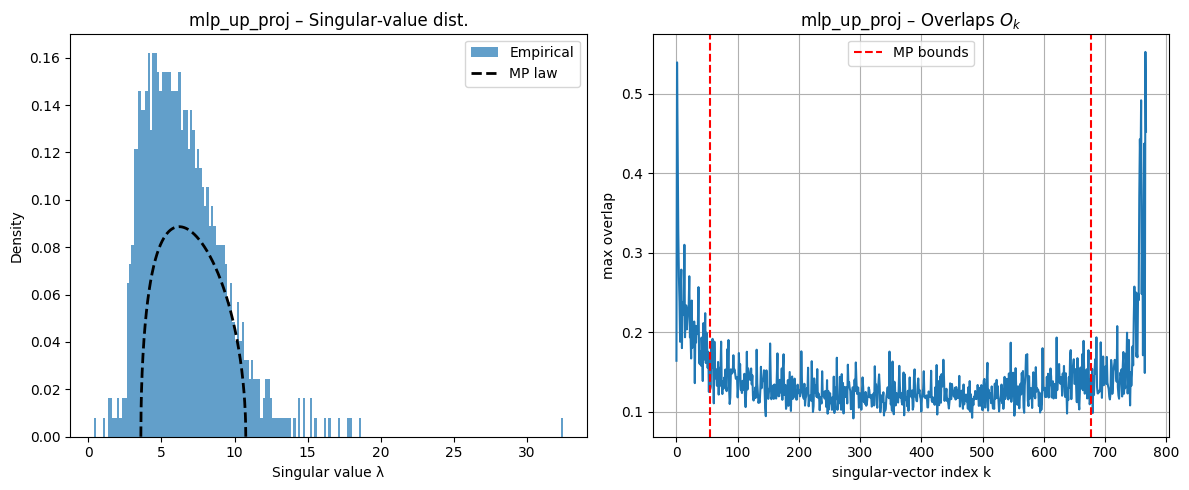

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [40.800926 13.37185  12.183411 11.731571 11.369176]
      MP bounds: [0.000, 7.633]
      top 5 overlaps: [0.92069795 0.28323303 0.26128794 0.34062281 0.17965096]



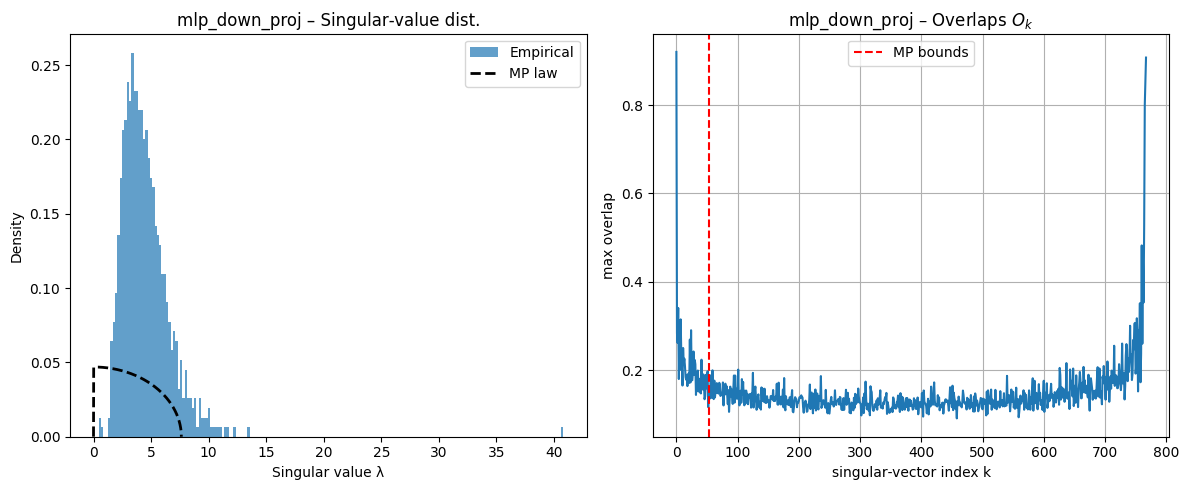


=== Block 4 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [14.514586   7.6902137  7.2251496  6.8359456  6.733054 ]
      MP bounds: [0.000, 5.153]
      top 5 overlaps: [0.12624975 0.19166888 0.32103317 0.25881483 0.1771565 ]



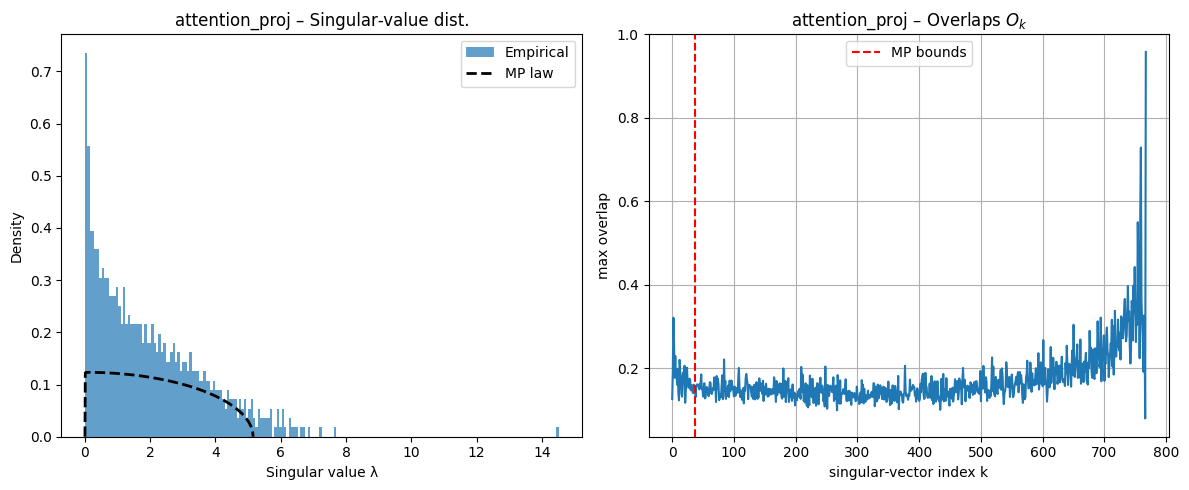

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [31.798595 20.03591  19.59754  18.404066 17.365112]
      MP bounds: [3.595, 10.784]
      top 5 overlaps: [0.14933717 0.30133929 0.23775766 0.44340334 0.49272659]



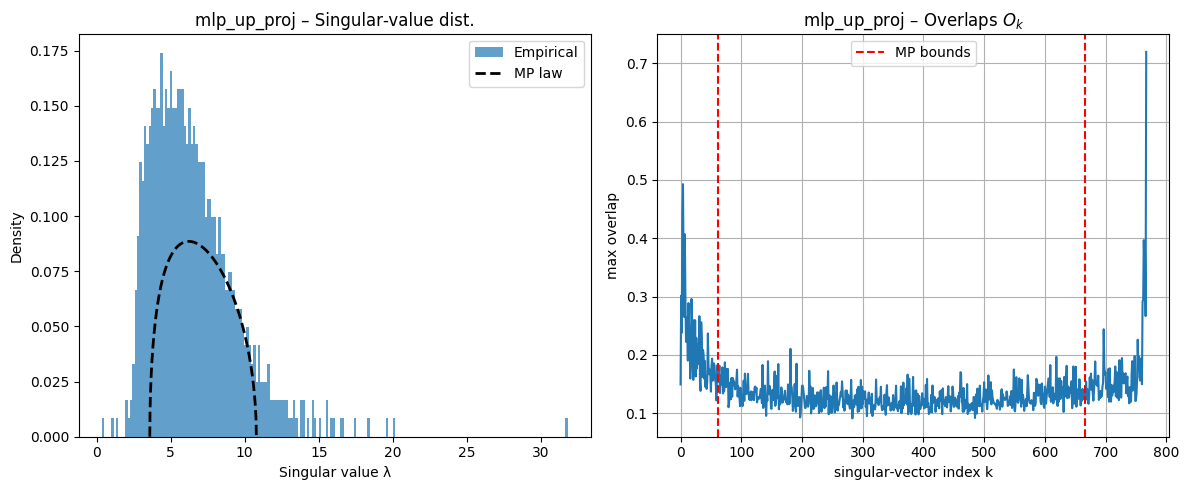

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [31.635202  14.195633  13.1287365 12.495579  11.97119  ]
      MP bounds: [0.000, 7.566]
      top 5 overlaps: [0.95292681 0.33168221 0.25419535 0.31952504 0.28470632]



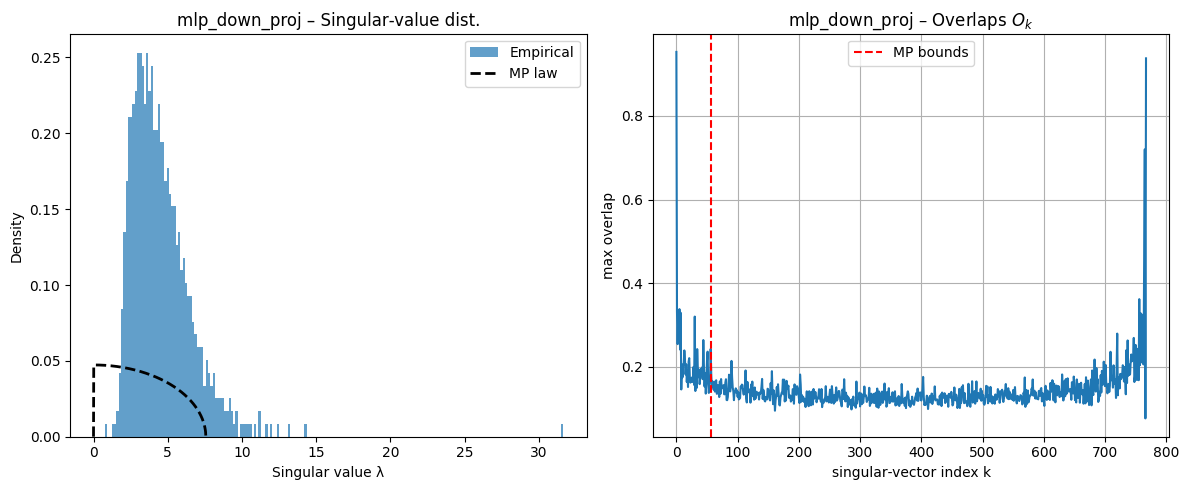


=== Block 5 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [12.8471575  8.734663   6.9979553  6.8258266  6.7345657]
      MP bounds: [0.000, 5.198]
      top 5 overlaps: [0.35039861 0.29402726 0.26401419 0.32633324 0.20915548]



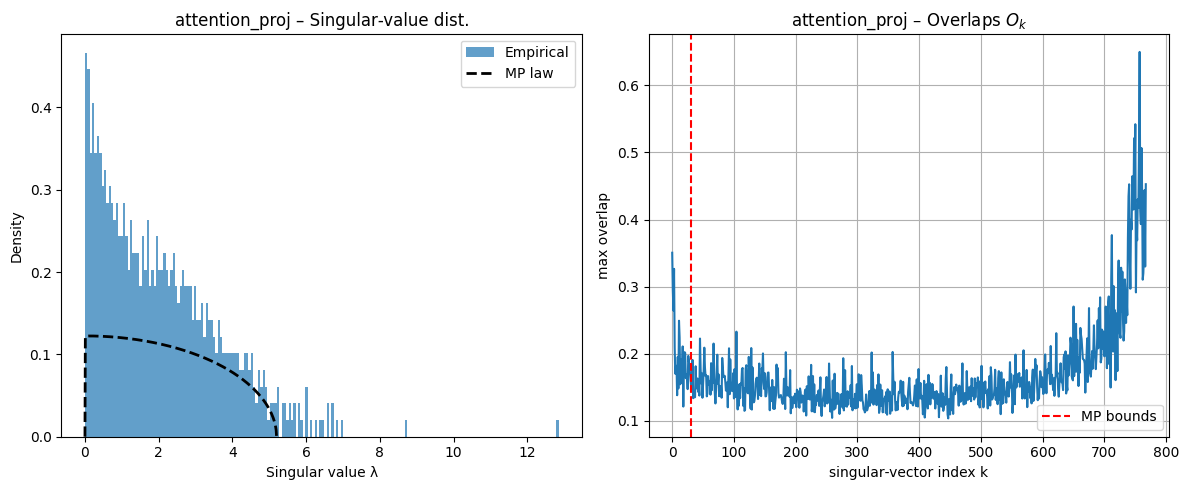

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [32.34236  19.454994 17.655796 16.909075 16.049355]
      MP bounds: [3.511, 10.534]
      top 5 overlaps: [0.29930001 0.35710089 0.39054063 0.26617329 0.39006889]



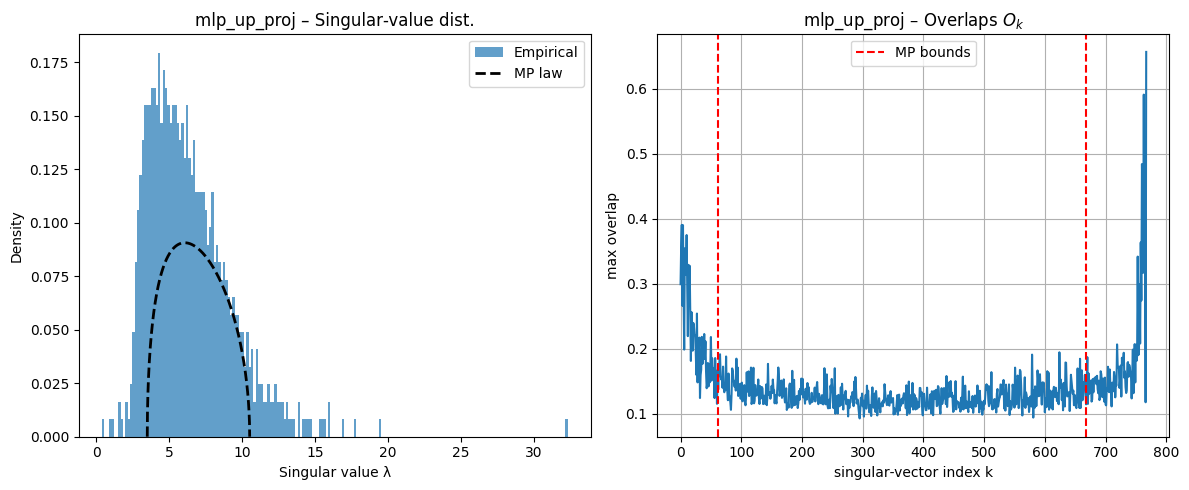

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [27.617653 17.5305   14.577294 13.227644 12.427411]
      MP bounds: [0.000, 8.094]
      top 5 overlaps: [0.90610881 0.35592436 0.64272268 0.17095913 0.28281816]



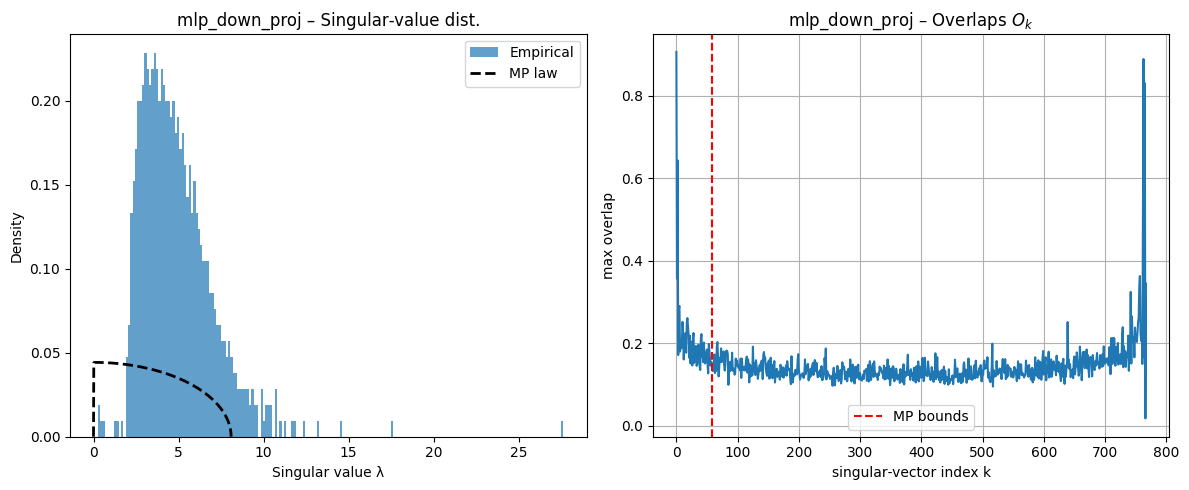


=== Block 6 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [14.976205 10.504531  8.933635  8.683279  8.554008]
      MP bounds: [0.000, 6.301]
      top 5 overlaps: [0.57956264 0.3026984  0.24887444 0.27931268 0.18429706]



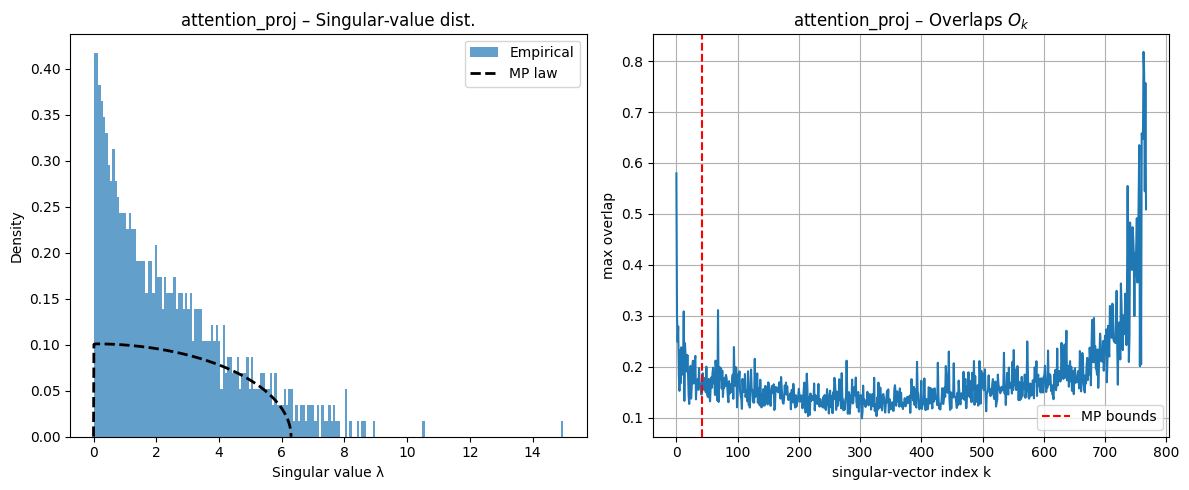

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [31.339052 19.069551 17.089031 16.592726 16.235947]
      MP bounds: [3.502, 10.505]
      top 5 overlaps: [0.27109936 0.23964004 0.15175803 0.25967463 0.20827012]



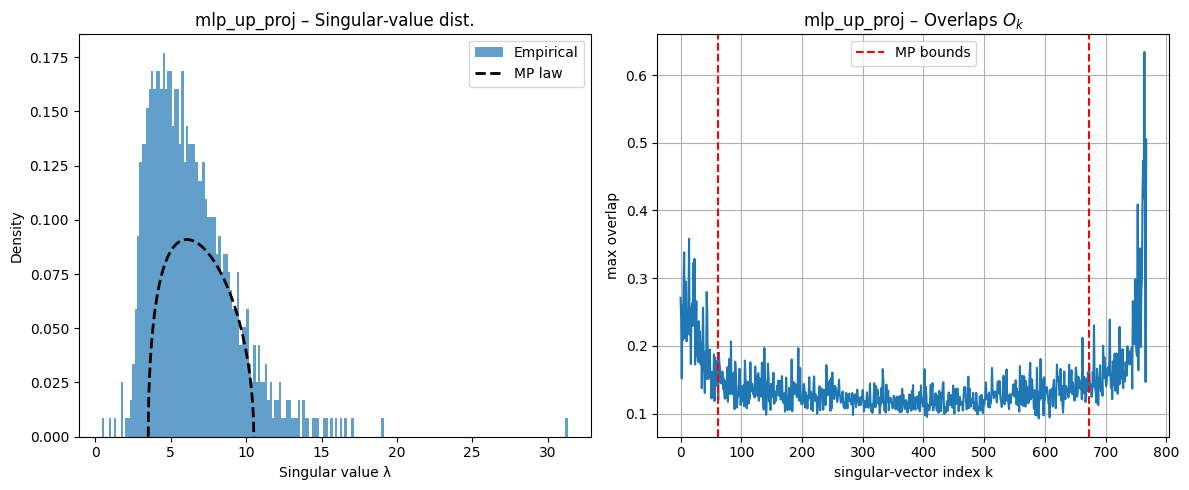

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [29.638233 18.041704 15.994411 14.23961  13.002974]
      MP bounds: [0.000, 8.923]
      top 5 overlaps: [0.65922554 0.59134638 0.4281392  0.22367103 0.27149637]



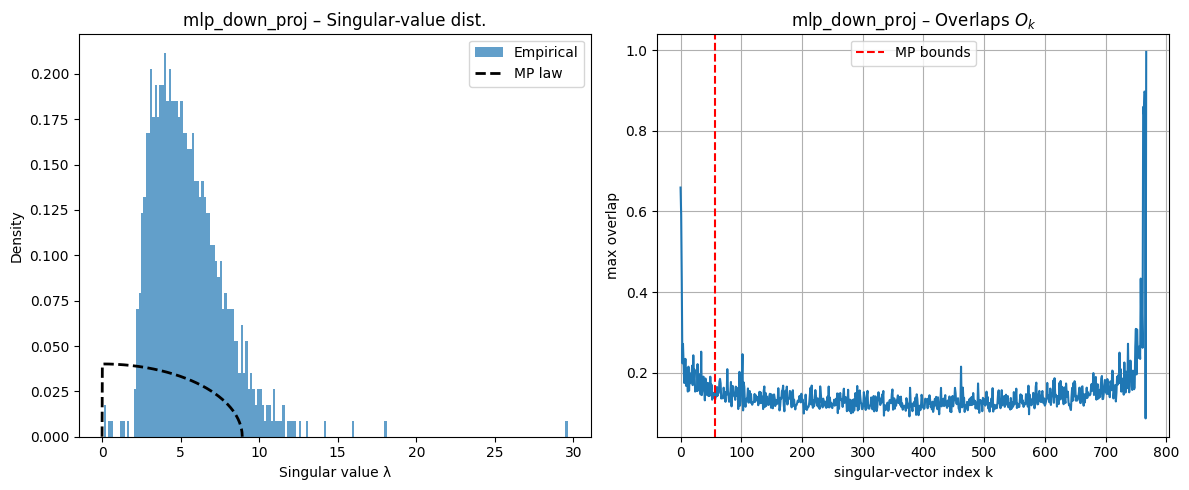


=== Block 7 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [17.20875   8.806689  8.410535  8.207532  8.049022]
      MP bounds: [0.000, 6.314]
      top 5 overlaps: [0.78574945 0.24710202 0.37904504 0.15123982 0.22877189]



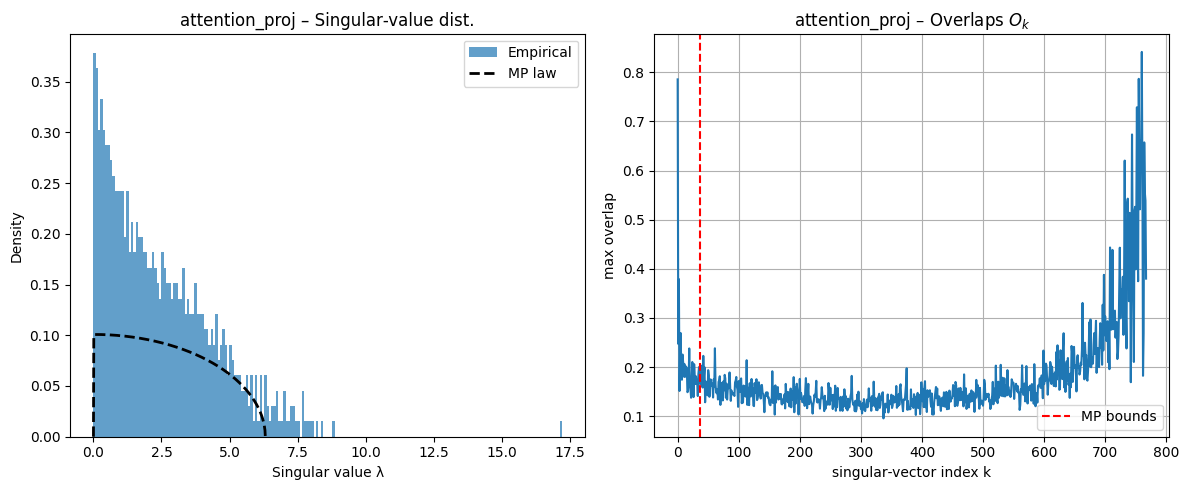

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [31.707386 18.081974 16.79188  16.392668 16.06701 ]
      MP bounds: [3.504, 10.511]
      top 5 overlaps: [0.35594748 0.21060033 0.22893193 0.4202753  0.27543837]



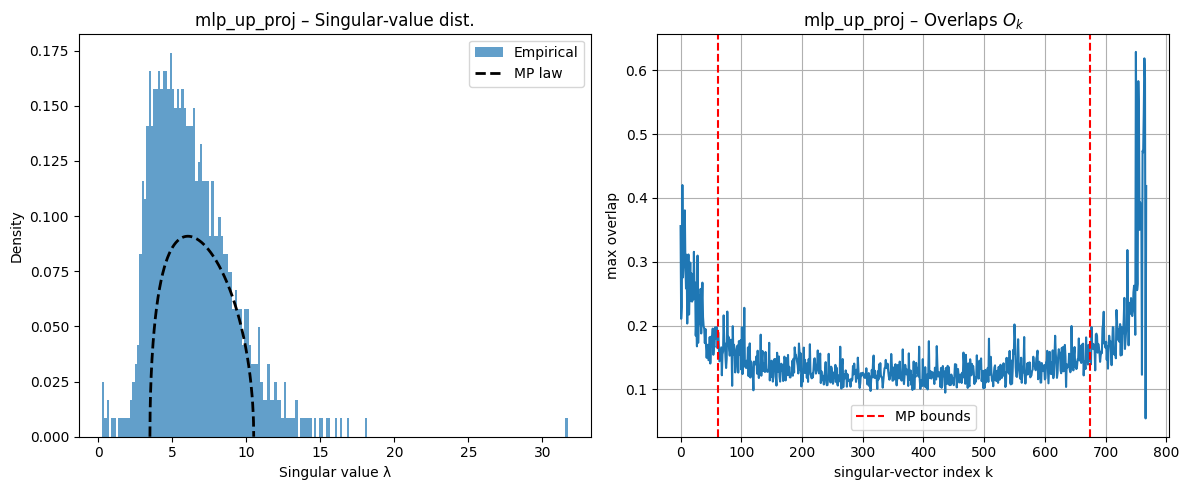

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [30.22702  16.795269 16.348082 15.20216  14.831345]
      MP bounds: [0.000, 9.871]
      top 5 overlaps: [0.629079   0.29531378 0.28559464 0.10179906 0.25984071]



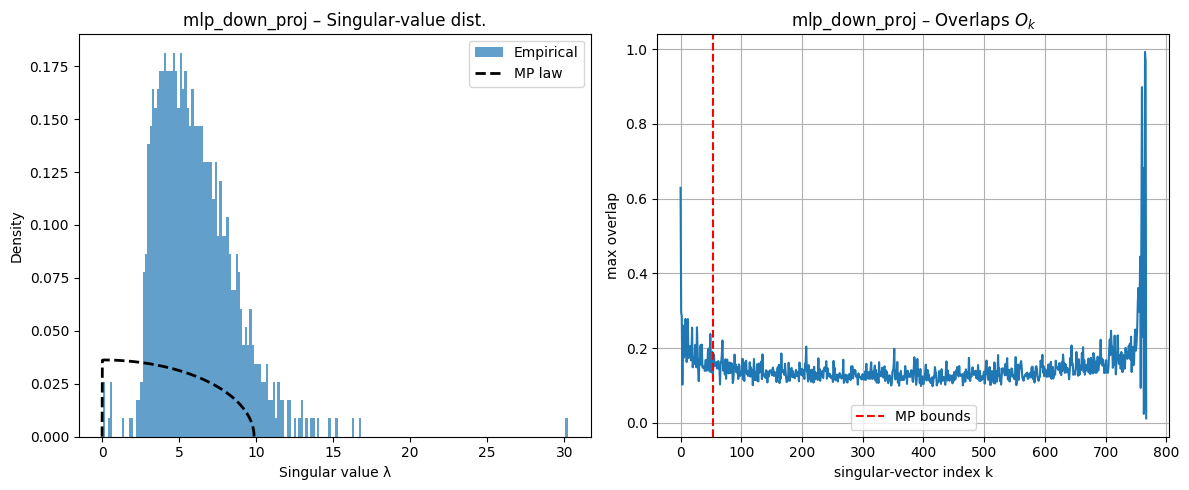


=== Block 8 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [20.103662  8.959008  8.428224  8.241531  8.121949]
      MP bounds: [0.000, 6.782]
      top 5 overlaps: [0.81305094 0.2100964  0.27231437 0.25978621 0.29063153]



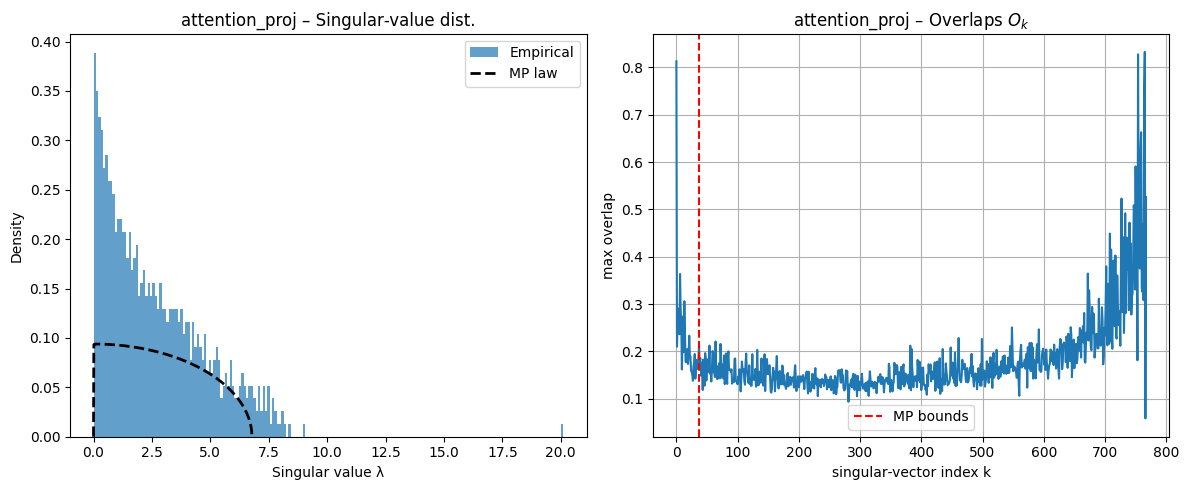

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [31.357363 17.16043  16.137678 15.926419 15.451833]
      MP bounds: [3.527, 10.582]
      top 5 overlaps: [0.31840699 0.63907427 0.31587279 0.22351679 0.26260808]



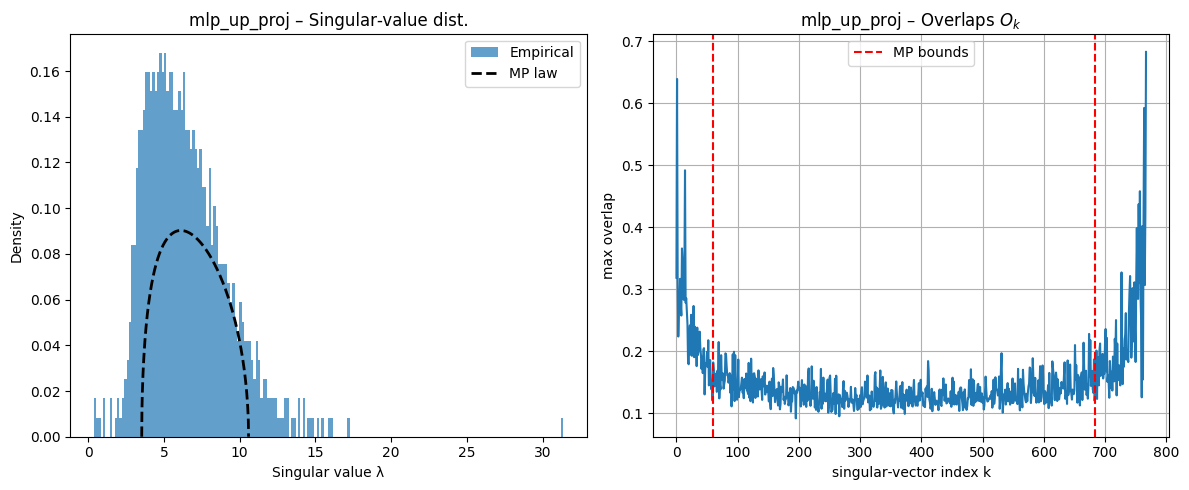

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [31.075823 24.49457  18.535086 16.77291  16.466679]
      MP bounds: [0.000, 11.257]
      top 5 overlaps: [0.90456406 0.31215563 0.34198871 0.24874695 0.28601882]



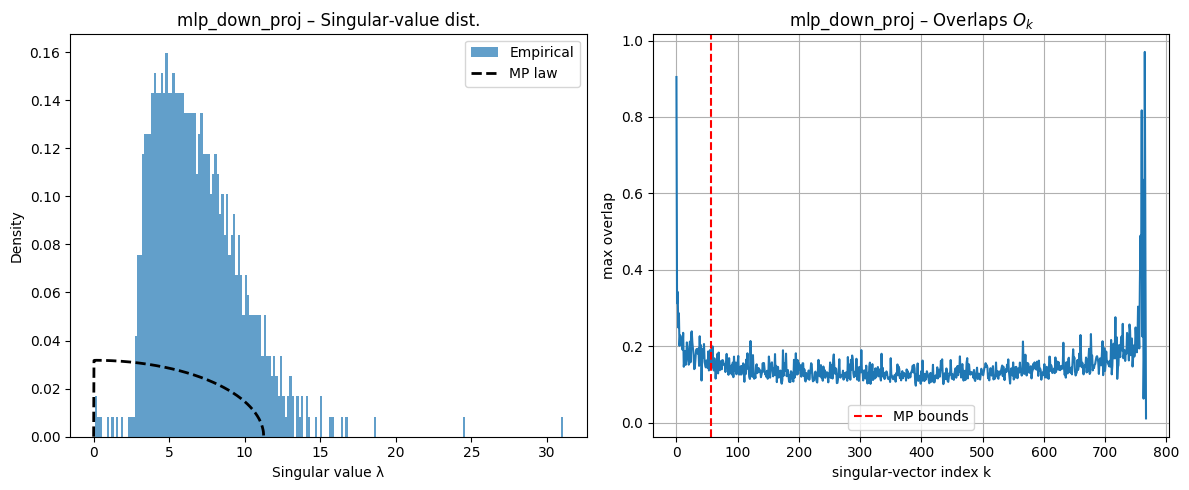


=== Block 9 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [22.452242   9.182421   8.1603775  7.9075723  7.732483 ]
      MP bounds: [0.000, 7.583]
      top 5 overlaps: [0.8245163  0.18108008 0.16866103 0.27694919 0.16708058]



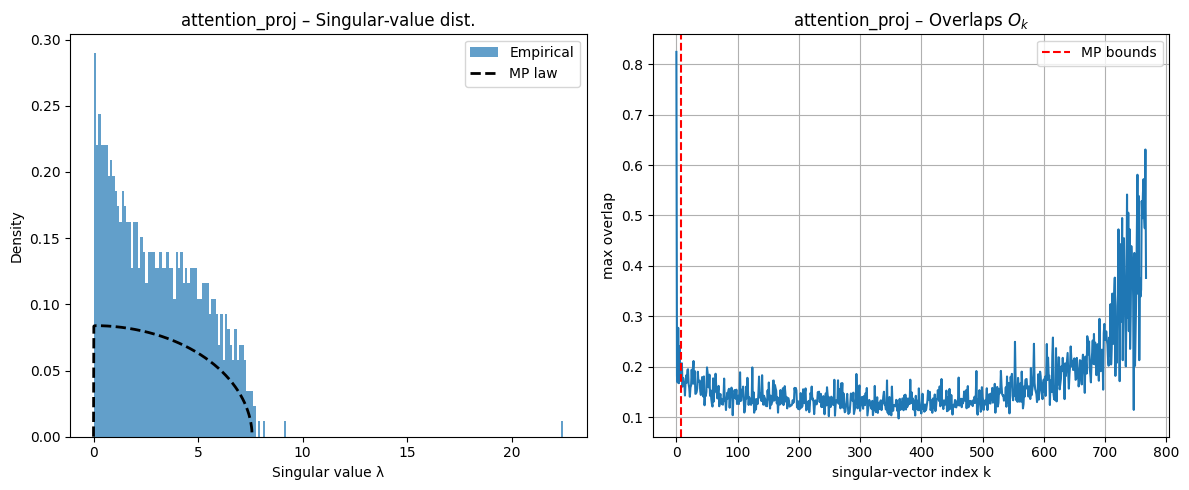

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [31.651958 16.711758 16.432095 16.153566 15.411688]
      MP bounds: [3.537, 10.610]
      top 5 overlaps: [0.30088449 0.33486282 0.5952326  0.28556509 0.20131554]



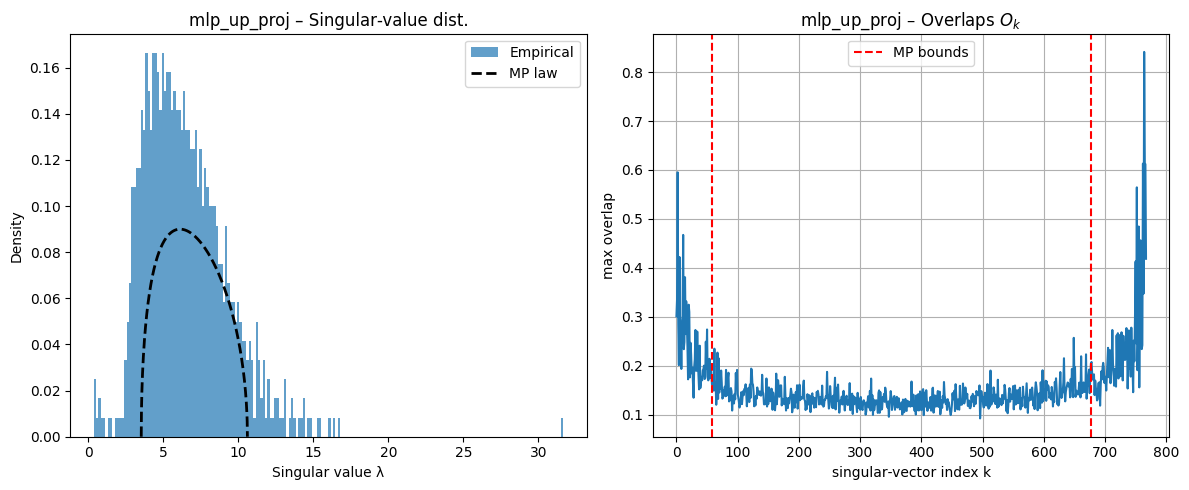

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [32.781742 21.967379 19.814129 18.585894 18.312464]
      MP bounds: [0.000, 12.959]
      top 5 overlaps: [0.19445549 0.25078563 0.24934476 0.28223319 0.18819647]



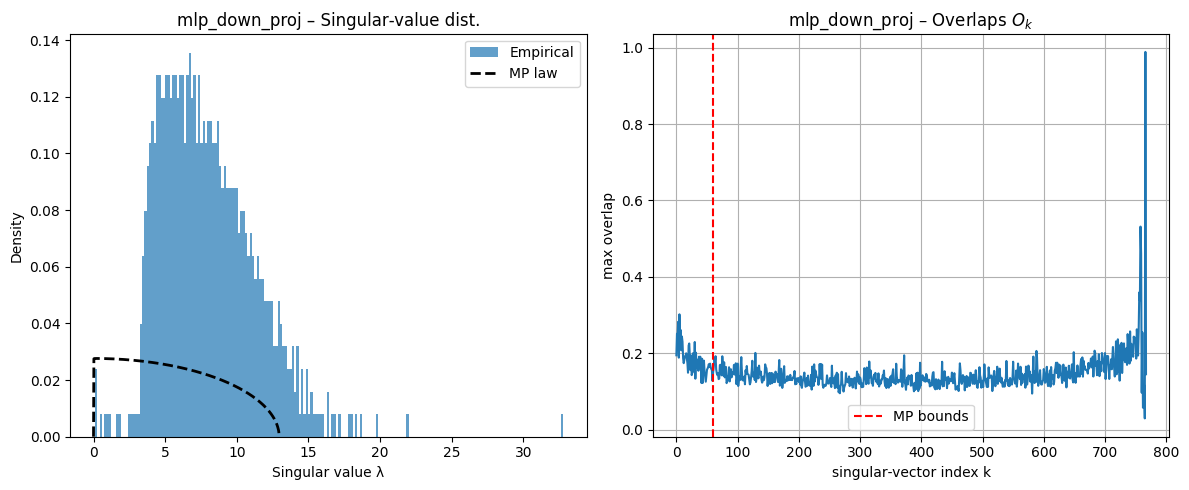


=== Block 10 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [32.691555   9.0246315  8.11909    8.033881   7.8633204]
      MP bounds: [0.000, 8.127]
      top 5 overlaps: [0.9124911  0.18894852 0.19310304 0.18534741 0.17968729]



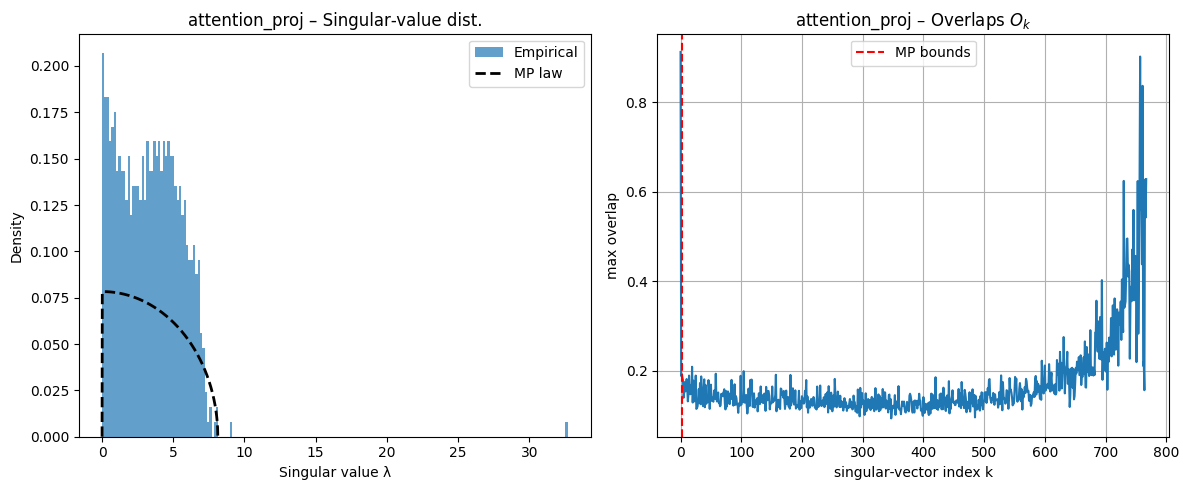

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [32.393982 17.449862 16.478851 16.4049   16.194548]
      MP bounds: [3.537, 10.612]
      top 5 overlaps: [0.22066849 0.37872652 0.19524046 0.20881311 0.35326564]



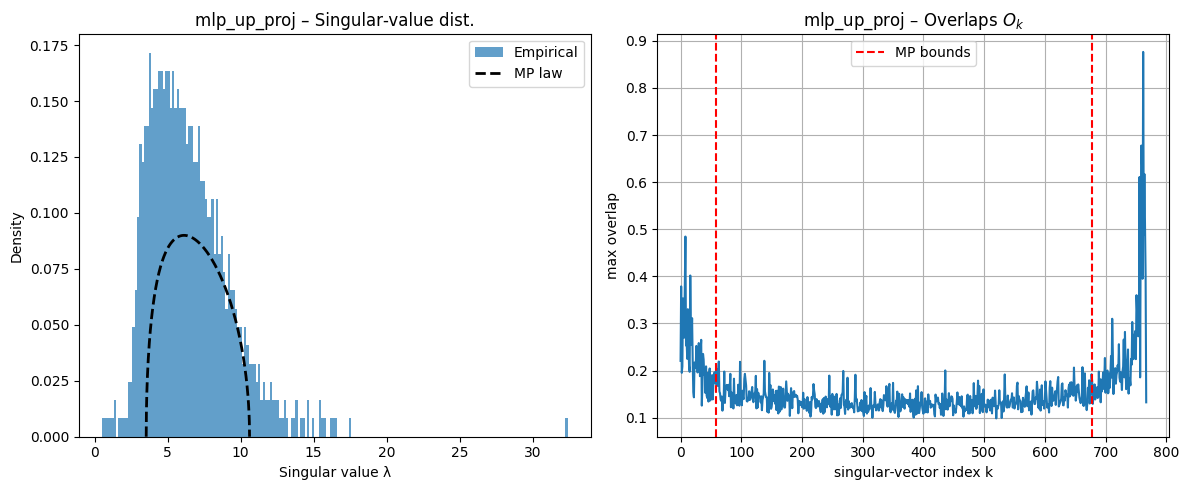

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [41.58502  28.194134 21.173475 20.170073 19.65728 ]
      MP bounds: [0.000, 14.811]
      top 5 overlaps: [0.92944486 0.08668599 0.26207938 0.17255727 0.26994666]



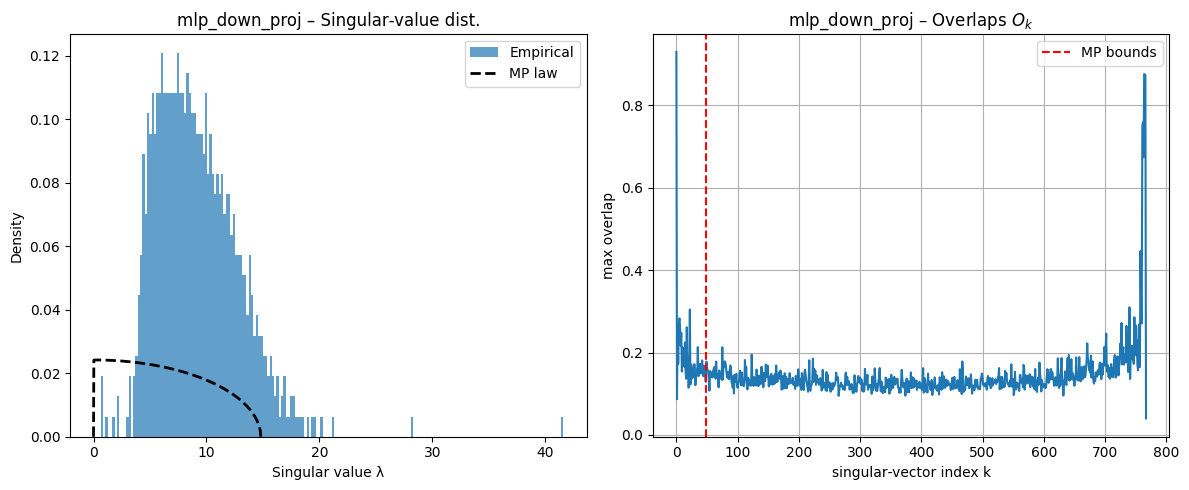


=== Block 11 ===
  attention_proj  | W.shape=(768, 768),  X.shape=(2454, 768)
      top 5 σ(W): [54.74722  44.475716 21.841862 20.334085 19.251245]
      MP bounds: [0.000, 10.083]
      top 5 overlaps: [0.01996031 0.71652608 0.78540604 0.53370507 0.71614262]



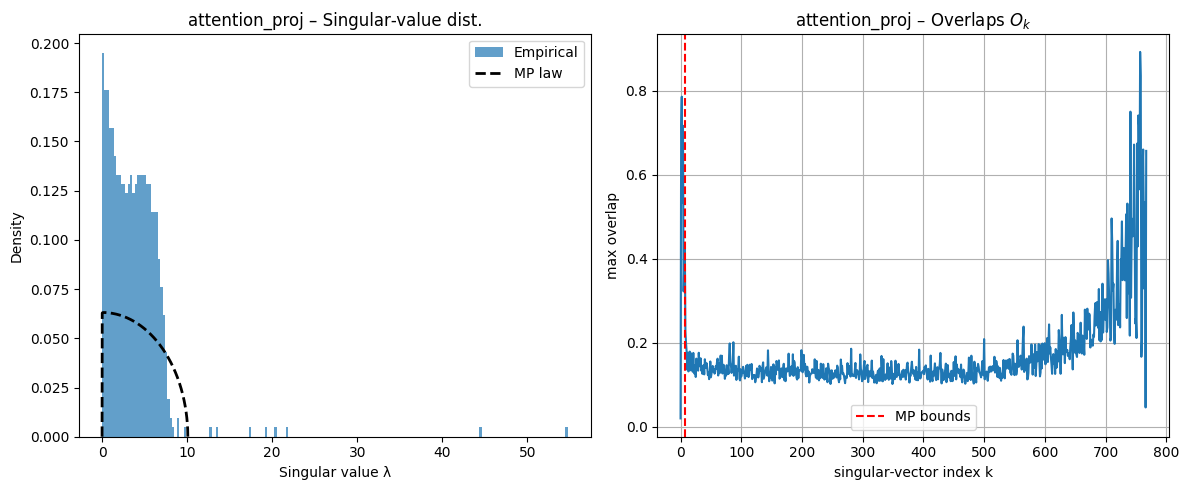

  mlp_up_proj     | W.shape=(768, 3072),  X.shape=(2454, 3072)
      top 5 σ(W): [37.453262 21.32021  18.730532 18.085861 17.168308]
      MP bounds: [3.603, 10.808]
      top 5 overlaps: [0.32946872 0.27428146 0.39007706 0.28233899 0.29188567]



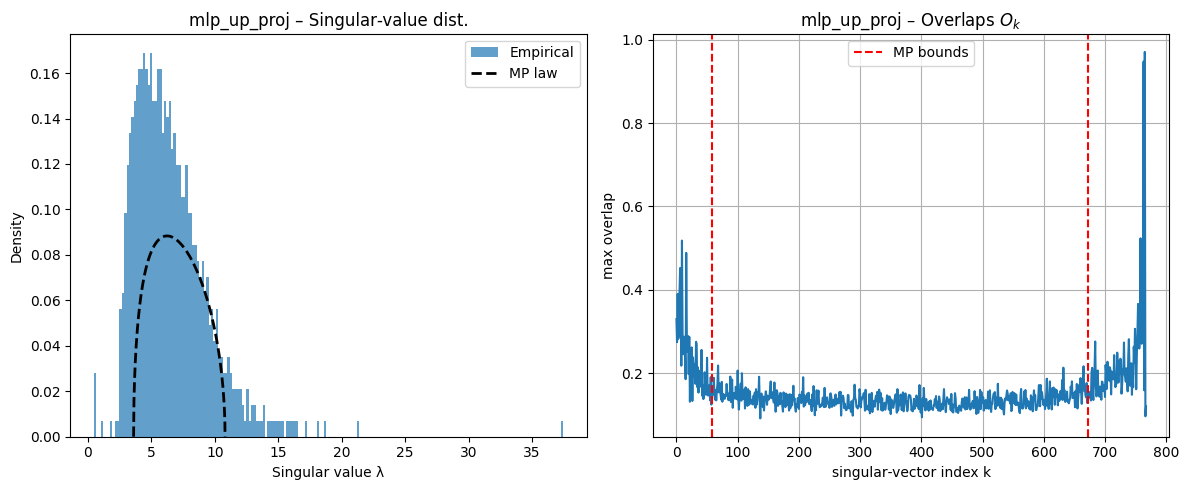

  mlp_down_proj   | W.shape=(3072, 768),  X.shape=(2454, 768)
      top 5 σ(W): [60.993053 34.59367  32.184093 21.966328 21.700237]
      MP bounds: [0.000, 16.480]
      top 5 overlaps: [0.31277411 0.7420628  0.74798406 0.19566367 0.15850143]



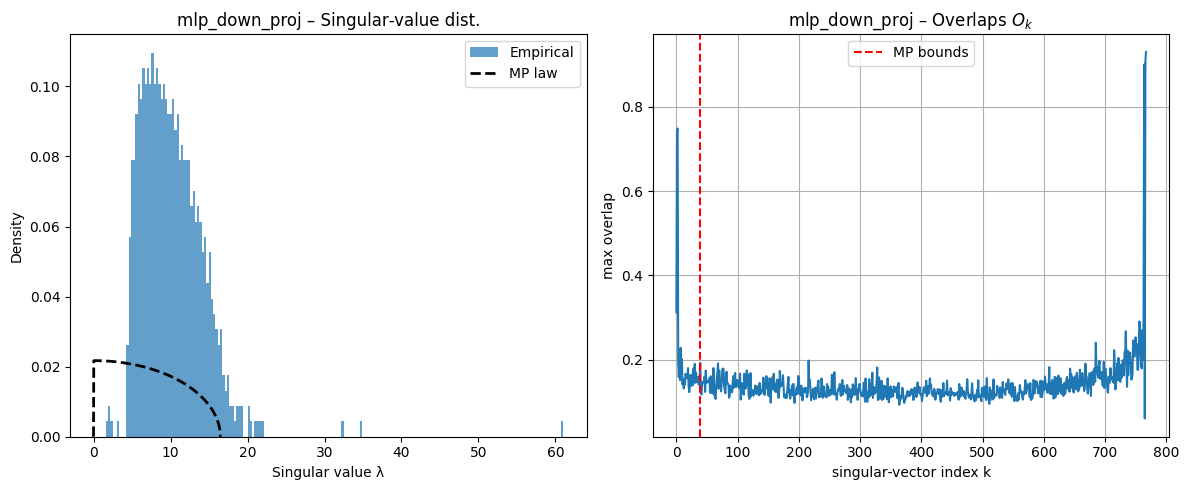

In [13]:
# For each block & sublayer, slice out the right activations
for block_idx in range(num_blocks):
    print(f"\n=== Block {block_idx} ===")
    # each hook list is length = num_blocks * len(prompts)
    # index formula: prompt_i * num_blocks + block_idx
    def slice_acts(key):
        lst = activations[key]
        # build a (N, seq_len, dim) list
        out = []
        for p_i in range(len(prompts)):
            out.append(lst[p_i * num_blocks + block_idx])
        return torch.cat(out, dim=0)  # (N*seq_len, dim)

    # 3 sub-layers
    sublayers = {
        "attention_proj": {
            "W":  model.transformer.h[block_idx].attn.c_proj.weight.data.cpu().numpy(),
            "X":  slice_acts("attn.c_proj")              # post-attention (seq_len,d)
        },
        "mlp_up_proj": {
            "W":  model.transformer.h[block_idx].mlp.c_fc.weight.data.cpu().numpy(),
            "X":  slice_acts("mlp.c_fc")          # pre-nonlin (seq_len,4d)
        },
        "mlp_down_proj": {
            "W":  model.transformer.h[block_idx].mlp.c_proj.weight.data.cpu().numpy(),
            "X":  slice_acts("mlp.c_proj")           # post-GELU (4d,seq_len)
        },
    }

    for name, info in sublayers.items():
        W = info["W"]           # shape (m,n)
        X = info["X"]           # torch.Tensor (N, n)
        N, n = X.shape

        # 4) compute covariance F = (X-μ)ᵀ(X-μ)/N  →  (n,n)
        μ = X.mean(dim=0, keepdim=True)
        Xc = X - μ
        F = (Xc.T @ Xc) / N     # torch Tensor (n,n)

        # 5) eigendecompose
        F_cpu = F.detach().cpu().double() 
        eigvals, eigvecs = torch.linalg.eigh(F_cpu)      
        # reorder descending
        eigvals = eigvals.flip(0).cpu().numpy()      # (n,)
        eigvecs = eigvecs.flip(1).cpu().numpy()      # (n,n)

        # 6) SVD of W: W = U Σ Vᵀ, so Vᵀ has shape (m, n)
        #    its rows are the right singular vectors v_kᵀ ∈ Rⁿ
        _, svals, Vt = np.linalg.svd(W, full_matrices=False)

        # 7) overlaps: for each row k in Vt, find max dot with any f_j
        overlaps = np.max(Vt @ eigvecs, axis=1)       # → (m,)

        # 8) Marchenko–Pastur support
        m, n = W.shape
        q = m / n
        σ = np.std(W)*np.sqrt(n)
        lam_min = σ * (1 - np.sqrt(q))
        lam_min = np.where(lam_min < 0, 0, lam_min)
        lam_max = σ * (1 + np.sqrt(q))

        svals_desc = np.sort(svals)[::-1]   # now svals_desc[0] is largest

        # (a) index boundary for large‐outliers:
        #      find all k where svals_desc[k] > lam_max
        above = np.where(svals_desc > lam_max)[0]
        if above.size:
            # the *last* one is above.max(), 
            # so the first in‐bulk index is above.max()+1
            k_plus = above.max() + 1  
        else:
            k_plus = 0   # no large outliers

        # (b) index boundary for small‐outliers:
        below = np.where(svals_desc < lam_min)[0]
        if below.size:
            # the *first* one below lam_min is below.min()
            k_minus = below.min()
        else:
            k_minus = len(svals_desc)  # no small outliers

        print(f"  {name:15s} | W.shape={(W.shape)},  X.shape={(N,n)}")
        print(f"      top 5 σ(W): {svals[:5]}")
        print(f"      MP bounds: [{lam_min:.3f}, {lam_max:.3f}]")
        print(f"      top 5 overlaps: {overlaps[:5]}\n")

        # MP density
        λ = np.linspace(lam_min, lam_max, 500)
        pdf = (1/(2*np.pi*σ**2*q)) * np.sqrt((lam_min**2-λ**2)*(λ**2-lam_max**2)) / (λ+0.0001)

        # after you have `svals`, _before_ the line‐plot:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)

        # (a) empirical histogram
        counts, bins, _ = plt.hist(svals, bins=200, density=True,
                                alpha=0.7, label='Empirical')
        plt.plot(λ, pdf, 'k--', linewidth=2, label='MP law')
        plt.xlabel('Singular value λ')
        plt.ylabel('Density')
        plt.title(f'{name} – Singular‐value dist.')
        plt.legend()

        # (c) overlaps on the right
        plt.subplot(1,2,2)
        plt.plot(overlaps)
        plt.axvline(k_plus, color='r', linestyle='--', label='MP bounds')
        if lam_min>0: plt.axvline(k_minus, color='r', linestyle='--')
        plt.title(f'{name} – Overlaps $O_k$')
        plt.xlabel('singular‐vector index k')
        plt.ylabel('max overlap')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

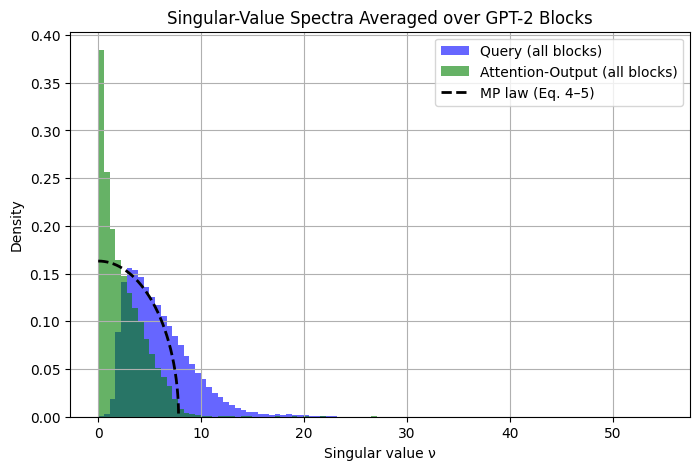

In [ ]:
d = model.config.hidden_size
num_blocks = len(model.transformer.h)

# 1) collect all singular values
sv_Q = []
sv_O = []

for ℓ in range(num_blocks):
    block = model.transformer.h[ℓ]
    # stacked c_attn: weight shape (3d, d), split into Q, K, V
    W_c_attn = block.attn.c_attn.weight.data.cpu().numpy()  # (3d, d)
    WQ = W_c_attn[0:d, :]                                   # Query projection (d,d)
    WO = block.attn.c_proj.weight.data.cpu().numpy()       # Attention-Output (d,d)

    # singular values
    sQ = np.linalg.svd(WQ, compute_uv=False)
    sO = np.linalg.svd(WO, compute_uv=False)

    sv_Q.append(sQ)
    sv_O.append(sO)

# flatten into single vectors
all_sQ = np.hstack(sv_Q)  # shape (num_blocks * d,)
all_sO = np.hstack(sv_O)

# 2) estimate MP parameters from the empirical variance of WQ entries
#    here m=n=d, so q=1, sigma^2 = var(WQ)
all_WQ = np.vstack([model.transformer.h[ℓ].attn.c_attn.weight.data.cpu().numpy()[0:d,:]
                    for ℓ in range(num_blocks)])
sigma2 = all_WQ.var()
m, n = d, d
q = m / n
sigma_tilde = np.sqrt(sigma2) * np.sqrt(n)
ν_minus = sigma_tilde * (1 - np.sqrt(m/n))
ν_plus  = sigma_tilde * (1 + np.sqrt(m/n))

# grid for MP density
ν = np.linspace(max(ν_minus, 1e-6), ν_plus, 500)
prefac = (n/m) / (np.pi * sigma_tilde**2 * ν)
mp_pdf = prefac * np.sqrt((ν_plus**2 - ν**2) * (ν**2 - ν_minus**2))

# 3) plot
plt.figure(figsize=(8, 5))
bins = np.linspace(0, max(all_sQ.max(), all_sO.max()), 100)

plt.hist(all_sQ, bins=bins, density=True,
         alpha=0.6, color='blue',  label='Query (all blocks)')
plt.hist(all_sO, bins=bins, density=True,
         alpha=0.6, color='green',label='Attention-Output (all blocks)')

plt.plot(ν, mp_pdf, 'k--', linewidth=2, label='MP law (Eq. 4–5)')

plt.title('Singular-Value Spectra Averaged over GPT-2 Blocks')
plt.xlabel('Singular value ν')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()